# Vizualizing the History of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [180]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Analyzing the Nobel Prize winner data to identify patterns by answering the following questions:
- What is the most commonly awarded gender and birth country?
- Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
- Which decade and Nobel Prize category combination had the highest proportion of female laureates?
- Who was the first woman to receive a Nobel Prize, and in what category?
- Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [181]:
# Reading the data 
nobel = pd.read_csv("data/nobel.csv")
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## What is the most commonly awarded gender and birth country?

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Number of Nobels')]

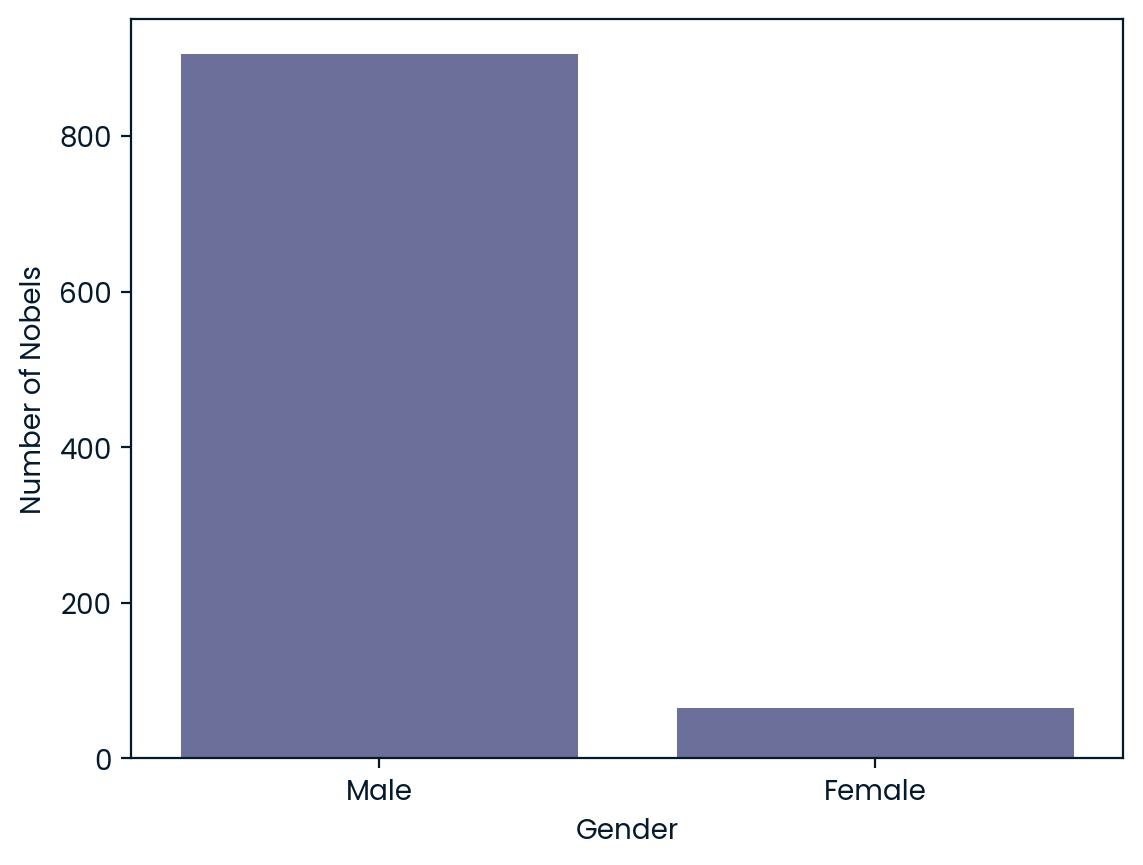

In [182]:
# Displaying the number of nobels for each gender 
h = sns.countplot(x="sex", data = nobel)
h.set(xlabel = "Gender",
      ylabel = "Number of Nobels")

In [183]:
# Finding the most commonly awarded gender 
top_gender = nobel["sex"].value_counts().index[0]
print(top_gender)

Male


Since there are too many countries making a plot with all of them could result in an not so appropriate plot, so directly calculating the country with the most novels yields:

In [184]:
# Finding the most commonly awarded country 
top_country = nobel["birth_country"].value_counts().index[0]
print(top_country)

United States of America


## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

To round up the decade we use `np.floor`.
The floor of the scalar $x$ is the largest integer $i$, such that $i <= x$. It is often denoted as $\lfloor x \rfloor$.  

The function `.astype()` cast a pandas object to a specified `dtype`.

In [185]:
# Creating a column whith us winners 
nobel["usa_winner"] = nobel["birth_country"] == "United States of America"

# Creating a decade column
nobel["decade"] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# Finding the US-born-winner ratio 
ratio = nobel.groupby("decade", as_index=False)["usa_winner"].mean()

In [186]:
# Identify the decade with the highest ratio of US-born winners

# This is a more efficient way to do it 
# max_decade_usa = ratio.loc[ratio['usa_winner'].idxmax(), 'decade']

# This is another approach 
max_decade_usa = ratio[ratio['usa_winner'] == ratio['usa_winner'].max()]['decade'].values[0]
max_decade_usa

2000

We can visualize the decades and the usa winners in a line plot, this plot describes periods of time well, `usa_winner` axis correspond to the percentage of usa winners in that decade.

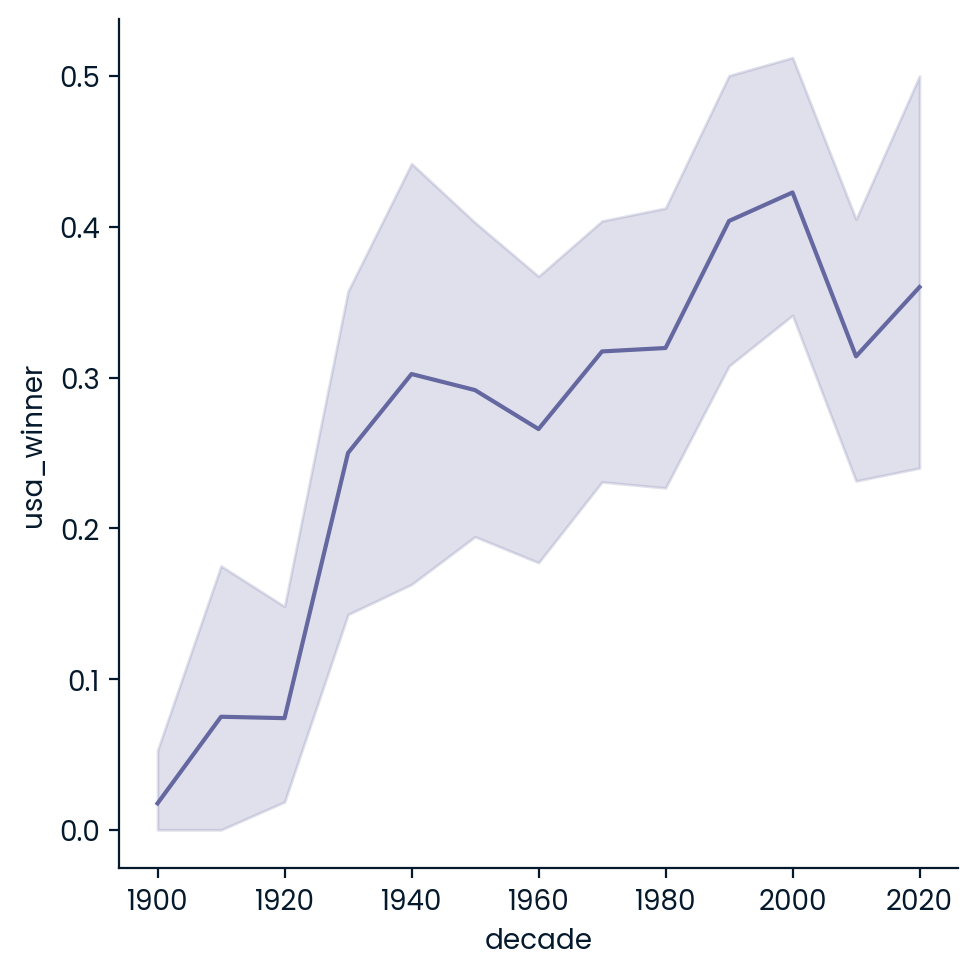

In [187]:
sns.relplot(x= "decade", y = "usa_winner",
           data = nobel,
           kind = "line") 

## Who was the first woman to receive a Nobel Prize, and in what category?

First star by finding the decade and category with the highest proportion of female laureates

In [188]:
# Creating a column whith female winners 
nobel["Female"] = nobel["sex"] == "Female"

# Grouping by decade and category 
female = nobel.groupby(["decade", "category"], as_index=False)["Female"].mean()

decade_female = female[female['Female'] == female['Female'].max()][['decade', 'category']].values[0]

In [189]:
decade_female

array([2020, 'Literature'], dtype=object)

The decade with the most nobel prices to females was 2020 in the Literature category

In [190]:
max_female_dict = {
    decade_female[0] :
    decade_female[1]
}
print(max_female_dict)

{2020: 'Literature'}


This graph represents the percentage of nobels won by females in their corresponding decade and category

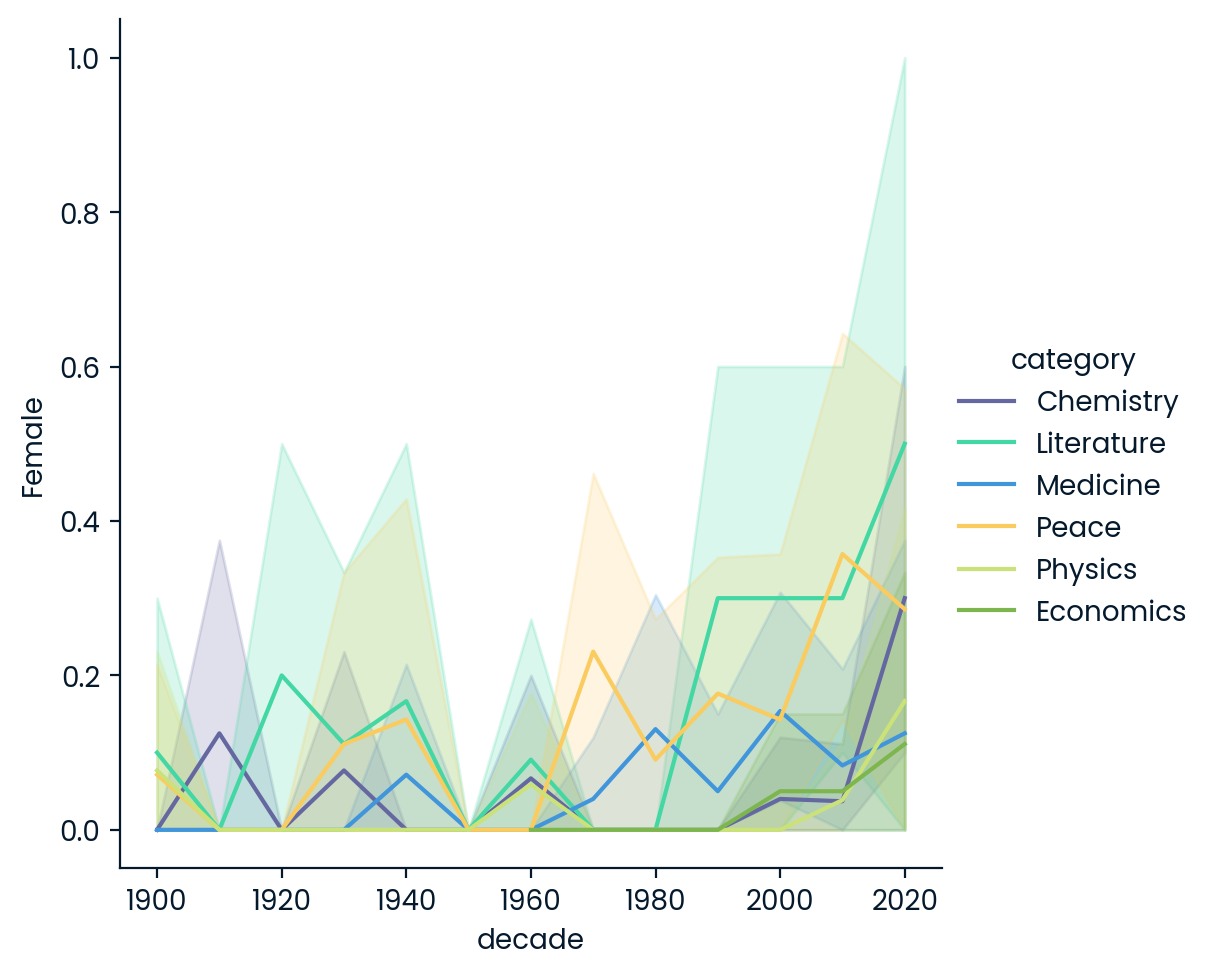

In [191]:
sns.relplot(x= "decade", y = "Female",
           data = nobel,
           kind = "line",
           hue = "category") 

## Who was the first woman to receive a Nobel Prize, and in what category?

In [192]:
# Using the female winner column created and filtering the DataFrame
female_df = nobel[nobel['Female']]

# Finding the lowest value in a column 
min_row = female_df[female_df['Female'] == female_df['Female'].min()]

In [193]:
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print("The first woman to win a nobel was " + first_woman_name + " in the category of " + first_woman_category)

The first woman to win a nobel was Marie Curie, née Sklodowska in the category of Physics


## Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [194]:
# Counting repeated winners, saving this as a Pandas Series 
counting = nobel["full_name"].value_counts()
repeated = counting[counting >= 2].index

In [195]:
# Making the previous Pandas Series into a list 
repeat_list =  list(repeated)
print(repeated_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
